<font size = "5">

Import packages

In [10]:
import requests      # Requests data from an API
import jmespath      # Allows you to mor easily navigate JSON objects
import pandas as pd  # Handles data frames

import json          # Handles JSON object

import matplotlib.pyplot as plt

<font size = "5">

Question 1

In [5]:
#here I use params function to filter the content in API

url_openalex_api = f"https://api.openalex.org/works"


#for the first question, we only use the keyword
params = {
    'filter': f'title.search:artificial intelligence',
}

search_results = requests.get(url_openalex_api,params=params)


#find total number of papers from the transformed JSON file
num_papers = search_results.json()['meta']['count']


#summarize result
print(f"There are {num_papers} papers that mention artificial intelligence in title")


# additionally, we can store the json file for readability and check the validity results. I repeat this step in every question. 

search_results_json = search_results.json()

with open('json_files/convert_search_results.json', 'w') as file: 
    file.write(json.dumps(search_results_json, indent =4))

There are 139710 papers that mention artificial intelligence in title


<font size = "5">

Question 2 

In [13]:
# we can add conditions in the API to search results

url_country = \
      "https://api.openalex.org/works?page=1&filter=display_name.search%3Aartificial%20intelligence,publication_year%3A2020-2024&group_by=authorships.countries"


#turn into JSON version

country_results = requests.get(url_country).json()



#find index
result = country_results["meta"]
country_number = result["groups_count"]



#create an empty data frame and loop through all countries to extract results

country_data = pd.DataFrame([])

for i in range(0,country_number):
    individual_data =country_results["group_by"][i]
    country_data.loc[i,1] = individual_data["key_display_name"]
    country_data.loc[i,2] = individual_data["count"]

#rename columns

country_data.columns = ['country', 'papers']





# produce a table that shows the number of publication sorted by country in descending order

country_descend= country_data.sort_values(by = "papers", ascending = False)
display(country_descend)



#we can also store the json file into the folder
with open('json_files/convert_country_results.json', 'w') as file: 
    file.write(json.dumps(country_results, indent =4))



,country,papers
0,United States of America,15820.0
1,China,13098.0
2,India,9810.0
3,United Kingdom of Great Britain and Northern I...,5466.0
4,Germany,3392.0
...,...,...
178,Curaçao,1.0
177,Belize,1.0
176,Bhutan,1.0
175,Bermuda,1.0


<font size = 5>

Question 3

In [14]:
#add conditions to search results


url_author = \
    "https://api.openalex.org/works?page=1&filter=display_name.search:artificial intelligence,publication_year:2020-2024&sort=cited_by_count:desc"
author_results = requests.get(url_author).json()

#can store the json file into the folder for readability

with open('json_files/convert_author_results.json', 'w') as file: 
    file.write(json.dumps(author_results, indent =4))



In [21]:
#find index
result = country_results["meta"]
country_number = result["groups_count"]



#create an empty data frame and loop through all countries to extract results

author_data = pd.DataFrame([])

# Add a line Create an emmpty data frame with column names

for i in range(0,10):
    #author_data.loc[i,"title"] =author_results["results"][i]["title"]

    author_data.loc[i,1] =author_results["results"][i]["title"]
    author_data.loc[i,2] =author_results["results"][i]["authorships"][0]["author"]["display_name"]
    author_data.loc[i,3] =author_results["results"][i]["authorships"][0]["institutions"][0]["display_name"]
    author_data.loc[i,4] = author_results["results"][i]["cited_by_count"]

#rename columns

author_data.columns = ['Title','Author', 'Affiliation',"Citation"]

display(author_data)



#explain the result
print(f"The above table shows the title, author, affiliation, and number of citations of the 10 most cited paper talking about Artificial Intelligence")




,Title,Author,Affiliation,Citation
0,Using Artificial Intelligence to Detect COVID-...,Lin Li,Jianghan University,1851.0
1,The role of artificial intelligence in achievi...,Ricardo Vinuesa,Swedish e-Science Research Centre,1502.0
2,Review of Artificial Intelligence Techniques i...,Feng Shi,United Imaging Healthcare (China),1296.0
3,Artificial Intelligence (AI) applications for ...,Raju Vaishya,Indraprastha Apollo Hospitals,1261.0
4,A Survey on Explainable Artificial Intelligenc...,Erico Tjoa,Nanyang Technological University,1168.0
5,Artificial Intelligence in Education: A Review,Lijia Chen,Yango University,1134.0
6,Photonics for artificial intelligence and neur...,Bhavin J. Shastri,Queen's University,1023.0
7,Artificial intelligence–enabled rapid diagnosi...,Xueyan Mei,Icahn School of Medicine at Mount Sinai,928.0
8,Human Trust in Artificial Intelligence: Review...,Ella Glikson,Bar-Ilan University,885.0
9,Comparing Physician and Artificial Intelligenc...,John W. Ayers,Qualcomm (United States),860.0


The above table shows the title, author, affiliation, and number of citations of the 10 most cited paper talking about Artificial Intelligence


<font size = 5>

Question 4

In [18]:

#pick keywords for loop
keywords = ["Artificial Intelligence", "LLM", "GPT","Machine Learning"] #my keyword of personal interest is "marchine learning"


# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Keyword', 'Year', 'Num_Works'])


# Loop over each keyword
for keyword in keywords:
    print(f"Processing keyword: {keyword}")
    
    # Inner loop for the years from 2000 to 2024
    for j in range(25):  # This goes from 0 to 24, corresponding to years 2000 to 2024
        year = 2000 + j
        url = "https://api.openalex.org/works"
        params = {
            'filter': f'display_name.search:{keyword},publication_year:{year}'
        }
        
        # Make the GET request
        r = requests.get(url, params=params)
        
        # Handle potential errors (e.g., network issues, invalid responses)
        if r.status_code == 200:
            num_works = r.json()['meta']['count']

           # Create a new DataFrame with the result
            new_row = pd.DataFrame({
                'Keyword': [keyword],
                'Year': [year],
                'Num_Works': [num_works]
            })
            
            # Concatenate the new row with the existing DataFrame
            results_df = pd.concat([results_df, new_row], ignore_index=True)
            print(f"Year: {year}, Number of works for {keyword}: {num_works}")
        else:
            print(f"Error fetching data for {keyword} in {year}: {r.status_code}")



Processing keyword: Artificial Intelligence
Year: 2000, Number of works for Artificial Intelligence: 285
Year: 2001, Number of works for Artificial Intelligence: 318
Year: 2002, Number of works for Artificial Intelligence: 463
Year: 2003, Number of works for Artificial Intelligence: 435
Year: 2004, Number of works for Artificial Intelligence: 464
Year: 2005, Number of works for Artificial Intelligence: 580
Year: 2006, Number of works for Artificial Intelligence: 566
Year: 2007, Number of works for Artificial Intelligence: 573
Year: 2008, Number of works for Artificial Intelligence: 585
Year: 2009, Number of works for Artificial Intelligence: 687
Year: 2010, Number of works for Artificial Intelligence: 626
Year: 2011, Number of works for Artificial Intelligence: 787
Year: 2012, Number of works for Artificial Intelligence: 825
Year: 2013, Number of works for Artificial Intelligence: 917
Year: 2014, Number of works for Artificial Intelligence: 956
Year: 2015, Number of works for Artificia

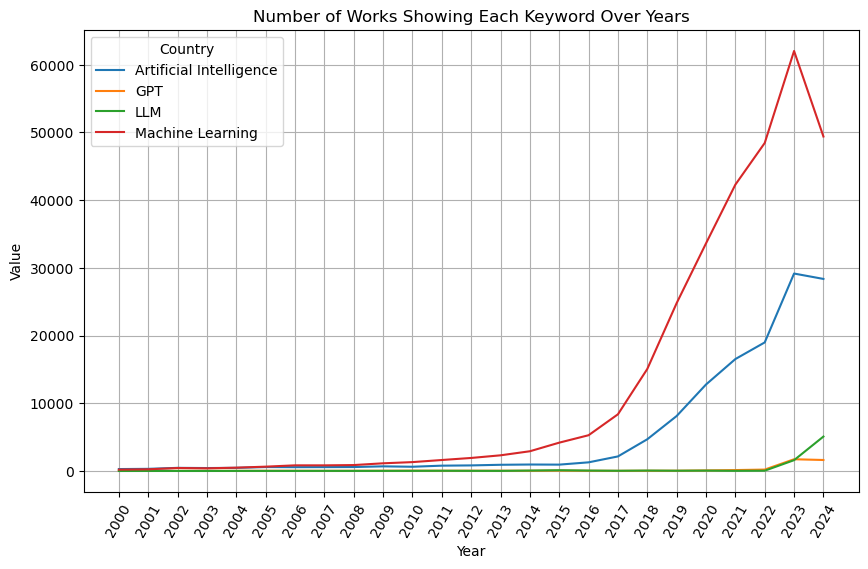

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


# Group by Country and Year, summing the values
grouped_df = results_df.groupby(['Year', 'Keyword'], as_index=False)['Num_Works'].sum()

# Pivot the DataFrame to have Years as index and Countries as columns
pivot_df = grouped_df.pivot(index='Year', columns='Keyword', values='Num_Works')

# Plotting the figure for all keywords
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_df, dashes=False)
plt.title('Number of Works Showing Each Keyword Over Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(pivot_df.index)  # Show all years on the x-axis
plt.legend(title='Country')
plt.grid()
plt.xticks(rotation=60)
plt.show()



<font size = 3>

The plot shows the number of works showing the four chosen keywords over each year since 2000. The number of publications with the word of 
"artificial intelligence" has increased sharply over the years, so as the word of "machine learning".In contrast, Works with keyword "LLM" and "GPT" has not increased a lot over the years.  